## Check Ant2 morphology rotation with inclusion of LMC.

In [2]:
## Plotting major axis (1sigma & 2sigma) on RA vs. Dec projection

In [3]:
from galpy.orbit import Orbit
from galpy.util import conversion
from galpy.potential import MWPotential2014, ChandrasekharDynamicalFrictionForce,HernquistPotential,MovingObjectPotential
from galpy.potential.mwpotentials import McMillan17
#from galpy.df import streamspraydf
from streamtools.df import streamspraydf
import numpy as np
import matplotlib.pyplot as plt

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)

/home/student04/.local/lib/python3.10/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old impo

In [23]:
# Curve-fitting the data to a line?

def f(x, m, b):
    return m*x + b

In [31]:
from scipy.optimize import curve_fit
par, pcov = curve_fit(f, ra, dec)

In [32]:
m = par[0]
b = par[1]

In [44]:
## plot line
def fxn(x, x1, x2, y1, y2):
    m = (y2-y1)/(x2-x1)
    b = y2 - m*x2
    return m*x + b

In [4]:
pot = MWPotential2014

ro = conversion.get_physical(pot)['ro']
vo = conversion.get_physical(pot)['vo']
to = conversion.time_in_Gyr(ro=ro, vo=vo)
mo = conversion.mass_in_msol(ro=ro, vo=vo)

mass_ant = 10**7.92 #msol
scale = 1 #kpc
tdisrupt = 5

# from kinematics paper
ant2 = Orbit([143.8017, -36.6991, 131.8, -0.094, 0.103, 288.8], ro=ro, vo=vo, radec=True)
ant_unc = [0.0492, 0.08, 0, 0.007, 0.008, 0.4]
ant2.turn_physical_off()

# from pace data
ant2_ = Orbit.from_name('AntliaII', ro=ro, vo=vo)
ant2_.turn_physical_off()

In [5]:
from stream_package.stream_package import graphics

## Without LMC

In [6]:
#oall, oleading, otrailing, dtall, dt, dtt = graphics.streamorbits(mass_ant, ant2, tdisrupt, pot=MWPotential2014, nstar=500)

In [7]:
# import astropy.units as u
# import astropy.coordinates as coord

# ant2.turn_physical_on()
# ant = coord.SkyCoord(ra = ant2.ra()*u.deg, dec = ant2.dec()*u.deg, distance = ant2.dist()*u.kpc,
#                     pm_ra_cosdec = ant2.pmra()*u.mas/u.yr, pm_dec = ant2.pmdec()*u.mas/u.yr,
#                     radial_velocity = ant2.vlos()*u.km/u.s)
# print(ant)
# ant.transform_to(coord.Galactocentric)
# ant.transform_to(coord.ICRS)
# print(ant)

# test = coord.SkyCoord(x = ant2.x()*u.kpc, y = ant2.y()*u.kpc, z = ant2.z()*u.kpc,
#                       v_x = ant2.vx()*u.km/u.s, v_y = ant2.vy()*u.km/u.s, v_z=ant2.vz()*u.km/u.s,
#                      frame=coord.Galactocentric)
# print(test)
# test.transform_to(coord.ICRS)
# print(test)

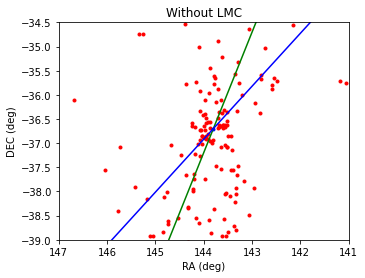

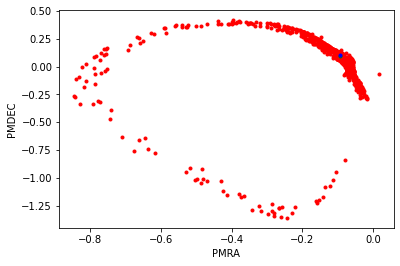

In [48]:
pmra = ant_stream.pmra()[(141 < ant_stream.ra()) & (ant_stream.ra() < 147) & (ant_stream.dec() < -34.5) & (-39 < ant_stream.dec())]
pmdec = ant_stream.pmdec()[(141 < ant_stream.ra()) & (ant_stream.ra() < 147) & (ant_stream.dec() < -34.5) & (-39 < ant_stream.dec())]


ra = ant_stream.ra()[(141 < ant_stream.ra()) & (ant_stream.ra() < 147) & (ant_stream.dec() < -34.5) & (-39 < ant_stream.dec())]
dec = ant_stream.dec()[(141 < ant_stream.ra()) & (ant_stream.ra() < 147) & (ant_stream.dec() < -34.5) & (-39 < ant_stream.dec())]

plt.plot(ant_stream.ra(), ant_stream.dec(), 'r.')
plt.plot(ant2.ra(), ant2.dec(), 'b.')
plt.axis('square')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)

x1 = [ant2.ra(), 143]
y1 = [ant2.dec(), -34.7]

#x2 = [ant2.ra(), ant2.ra() + np.mean(pmra)*3000]
#y2 = [ant2.dec(), ant2.dec() + np.mean(pmdec)*3000]

x = np.linspace(140, 150, 10)

plt.plot(x, fxn(x, x1[0], x1[1], y1[0], y1[1]), 'g-')
#plt.plot(x2, y2, 'g-')

plt.plot(x, fxn(x, ant2.ra(), ant2.ra() + ant2.pmra(), ant2.dec(), ant2.dec() + ant2.pmdec()), 'b-', label='')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('Without LMC')


plt.show();

plt.plot(ant_stream.pmra(), ant_stream.pmdec(), 'r.')
#plt.plot(pmra, pmdec, 'r.')
plt.plot(np.mean(pmra), np.mean(pmdec), 'g.')
plt.plot(ant2.pmra(), ant2.pmdec(), 'b.')
plt.xlabel('PMRA')
plt.ylabel('PMDEC')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC, no acceleration

In [9]:
#o_lmc, oall_lmc, dtall_lmc = graphics.streamorbitslmc(mass_ant, ant2, tdisrupt, pot=MWPotential2014, nstar=500)

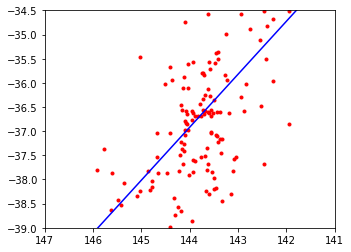

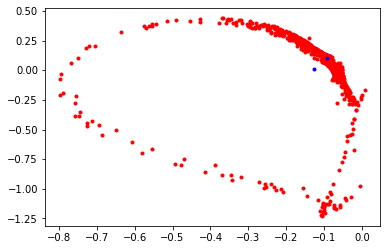

In [52]:
plt.plot(ant_streamlmc.ra(), ant_streamlmc.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.gca().set_aspect('equal')

#plt.plot(x, fxn(x, x1[0], x1[1], y1[0], y1[1]), 'g-')

plt.plot(x, fxn(x, ant2.ra(), ant2.ra() + ant2.pmra(),ant2.dec(), ant2.dec() + ant2.pmdec()), 'b-')

plt.show();

plt.plot(ant_streamlmc.pmra(), ant_streamlmc.pmdec(), 'r.')
plt.plot(np.mean(ant_streamlmc.pmra()), np.mean(ant_streamlmc.pmdec()), 'b.')
plt.plot(ant2.pmra(), ant2.pmdec(), 'b.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC & acceleration

In [11]:
#o_lmca, oall_lmca, dtall_lmca = graphics.streamorbitslmc_acc(mass_ant, ant2, tdisrupt, pot=MWPotential2014, nstar=500)

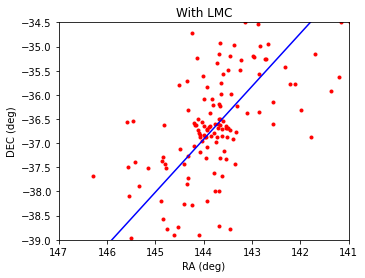

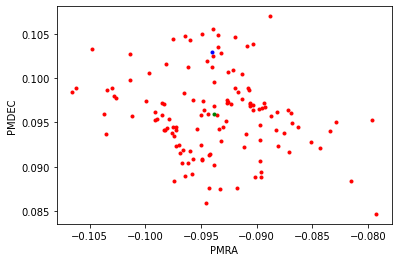

In [54]:
pmra = ant_streamlmca.pmra()[(141 < ant_streamlmca.ra()) & (ant_streamlmca.ra() < 147) & (ant_streamlmca.dec() < -34.5) & (-39 < ant_streamlmca.dec())]
pmdec = ant_streamlmca.pmdec()[(141 < ant_streamlmca.ra()) & (ant_streamlmca.ra() < 147) & (ant_streamlmca.dec() < -34.5) & (-39 < ant_streamlmca.dec())]
x2 = [ant2.ra(), ant2.ra() + np.mean(pmra)*3000]
y2 = [ant2.dec(), ant2.dec() + np.mean(pmdec)*3000]

plt.plot(ant_streamlmca.ra(), ant_streamlmca.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(147,141)
plt.ylim(-39, -34.5)
plt.gca().set_aspect('equal')

plt.plot(x, fxn(x, ant2.ra(), ant2.ra() + ant2.pmra(),ant2.dec(), ant2.dec() + ant2.pmdec()), 'b-')
#plt.plot(x2, y2, 'g-')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.title('With LMC')
plt.show();

#plt.plot(ant_streamlmca.pmra(), ant_streamlmca.pmdec(), 'r.')
plt.plot(pmra, pmdec, 'r.')
plt.plot(np.mean(pmra), np.mean(pmdec), 'g.')
plt.plot(ant2.pmra(), ant2.pmdec(), 'b.')
plt.xlabel('PMRA')
plt.ylabel('PMDEC')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

# Crater II

In [13]:
mass_cra = 10**6.74 #msol
#scale = 1 #kpc
tdisrupt = 5

# from kinematics paper
cra2 = Orbit([177.310, -18.413, 117.5, -0.073, -0.123, 89.3], ro=ro, vo=vo, radec=True)
cra_unc = [0, 0, 0, 0.021, 0.013, 0.3]
cra2.turn_physical_off()

# from pace data
cra2_ = Orbit.from_name('CraterII', ro=ro, vo=vo)
cra2_.turn_physical_off()

## Without LMC

In [14]:
#coall, coleading, cotrailing, cdtall, cdt, cdtt = graphics.streamorbits(mass_cra, cra2, tdisrupt, pot=MWPotential2014, nstar=500)

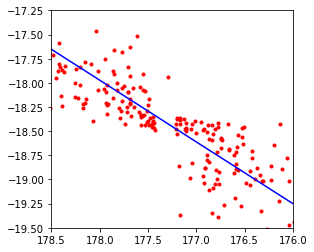

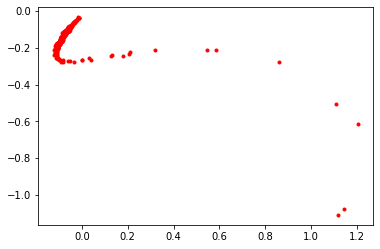

In [62]:
plt.plot(cra_stream.ra(), cra_stream.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(178.5,176)
plt.ylim(-19.5, -17.25)
plt.gca().set_aspect('equal')

x = np.linspace(176, 178.5)
plt.plot(x, fxn(x, cra2.ra(), 176,cra2.dec(), -19.25), 'b-')


plt.show();

plt.plot(cra_stream.pmra(), cra_stream.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC, no acceleration

In [16]:
#oc_lmc, coall_lmc, cdtall_lmc = graphics.streamorbitslmc(mass_cra, cra2, tdisrupt, pot=MWPotential2014, nstar=500)

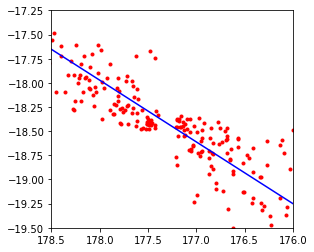

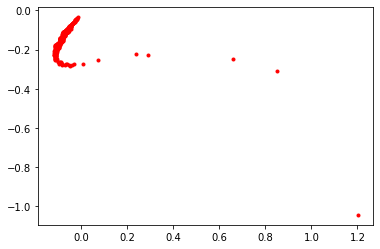

In [63]:
plt.plot(cra_streamlmc.ra(), cra_streamlmc.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(178.5,176)
plt.ylim(-19.5, -17.25)
plt.gca().set_aspect('equal')

plt.plot(x, fxn(x, cra2.ra(), 176,cra2.dec(), -19.25), 'b-')

plt.show();

plt.plot(cra_streamlmc.pmra(), cra_streamlmc.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## With LMC & acceleration

In [18]:
#oc_lmca, coall_lmca, cdtall_lmca = graphics.streamorbitslmc_acc(mass_cra, cra2, tdisrupt, pot=MWPotential2014, nstar=500)

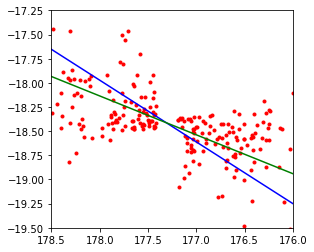

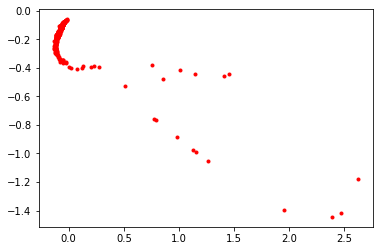

In [65]:
plt.plot(cra_streamlmca.ra(), cra_streamlmca.dec(), 'r.')
#plt.plot(orbst_noLMC.ra(), orbst_noLMC.dec(), 'b.')
plt.xlim(178.5,176)
plt.ylim(-19.5, -17.25)
plt.gca().set_aspect('equal')

plt.plot(x, fxn(x, cra2.ra(), 176,cra2.dec(), -19.25), 'b-')
plt.plot(x, fxn(x, cra2.ra(), 176.1,cra2.dec(), -18.9), 'g-')

plt.show();

plt.plot(cra_streamlmca.pmra(), cra_streamlmca.pmdec(), 'r.')
#plt.plot(orbst_noLMC.pmra(), orbst_noLMC.pmdec(), 'b.')
plt.show()

## Saving the stream data:

In [20]:
# import pickle
# #file_streams = open('antcra_stream.obj', 'wb')

# streams_dict = {
#     "Ant no LMC" : oall,
#     "Ant LMC" : oall_lmc,
#     "Ant LMC acc" : oall_lmca,
#     "Cra no LMC" : coall,
#     "Cra LMC" : coall_lmc,
#     "Cra LMC acc" : coall_lmca
# }

#pickle.dump(streams_dict, file_streams)
#file_streams.close()

In [21]:
import pickle
filehandler = open('antcra_stream.obj', 'rb') 
obj = pickle.load(filehandler)

ant_stream = obj.get("Ant no LMC")
ant_streamlmc = obj.get("Ant LMC")
ant_streamlmca = obj.get("Ant LMC acc")
cra_stream = obj.get("Cra no LMC")
cra_streamlmc = obj.get("Cra LMC")
cra_streamlmca = obj.get("Cra LMC acc")